In [2]:
#!pip install cantera

import matplotlib.pyplot as plt
import cantera as ct

In [3]:
# 
# First mixture object
#

mechanism = "gri30.yaml"  
gas = ct.Solution(mechanism)

# A class for chemically-reacting solutions. Can epresent any type of solution – 
# a mixture of gases, a liquid solution, or a solid solution, for example.
print("Mixture state for mechanism {}".format(mechanism))
print(gas())

Mixture state for mechanism gri30.yaml

  gri30:

       temperature   300 K
          pressure   1.0133e+05 Pa
           density   0.081894 kg/m^3
  mean mol. weight   2.016 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy             26469             53361  J
   internal energy       -1.2108e+06        -2.441e+06  J
           entropy             64910        1.3086e+05  J/K
    Gibbs function       -1.9447e+07       -3.9204e+07  J
 heat capacity c_p             14311             28851  J/K
 heat capacity c_v             10187             20536  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                H2                 1                 1           -15.717
     [  +52 minor]                 0                 0  

None


In [4]:
#
# Setting the state of a mixture (Method 1)
#

# Setup thermochemical state
T_mix = 300.0 # K
p_mix = ct.one_atm 
phi_mix = 0.5 
X_fuel = {"H2": 1.0} 
X_oxidizer = {"O2": 1.0, "N2": 3.76} 

mechanism = "h2o2.yaml"  
gas = ct.Solution(mechanism)
gas.TP = T_mix, p_mix
gas.set_equivalence_ratio(phi_mix, X_fuel, X_oxidizer, basis="mole")

print("Mixture state for mechanism {}".format(mechanism))
print(gas())

Mixture state for mechanism h2o2.yaml

  ohmech:

       temperature   300 K
          pressure   1.0133e+05 Pa
           density   0.98273 kg/m^3
  mean mol. weight   24.192 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy            2262.9             54745  J
   internal energy       -1.0084e+05       -2.4396e+06  J
           entropy            7889.7        1.9087e+05  J/K
    Gibbs function       -2.3646e+06       -5.7206e+07  J
 heat capacity c_p            1202.5             29091  J/K
 heat capacity c_v             858.8             20776  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                H2          0.014468           0.17361           -17.468
                O2           0.22963           0.17361           -26.425
                N2            0.7

In [5]:
#
# Setting the state of a mixture (Method 2)
#

# Setup thermochemical state
T_mix = 300.0 # K
p_mix = ct.one_atm 
phi_mix = 0.5 
X_mix = {"H2": 0.17361, "O2": 0.17361, "N2": 0.65278} 

mechanism = "h2o2.yaml"  
gas = ct.Solution(mechanism)
gas.TPX = T_mix, p_mix, X_mix

print("Mixture state for mechanism {}".format(mechanism))
print(gas())

Mixture state for mechanism h2o2.yaml

  ohmech:

       temperature   300 K
          pressure   1.0133e+05 Pa
           density   0.98273 kg/m^3
  mean mol. weight   24.192 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy            2262.9             54745  J
   internal energy       -1.0084e+05       -2.4396e+06  J
           entropy            7889.7        1.9087e+05  J/K
    Gibbs function       -2.3646e+06       -5.7206e+07  J
 heat capacity c_p            1202.5             29091  J/K
 heat capacity c_v             858.8             20776  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                H2          0.014467           0.17361           -17.468
                O2           0.22963           0.17361           -26.425
                N2           0.75

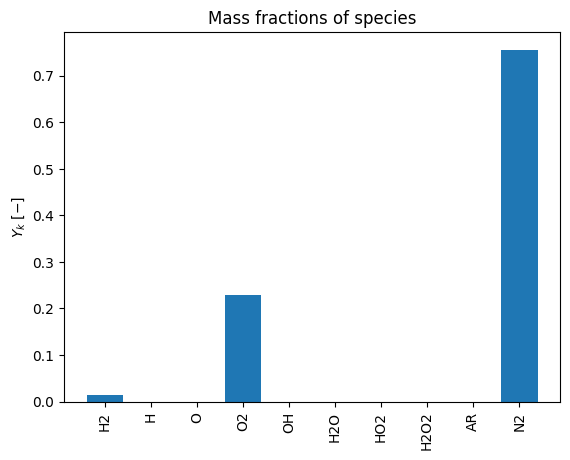

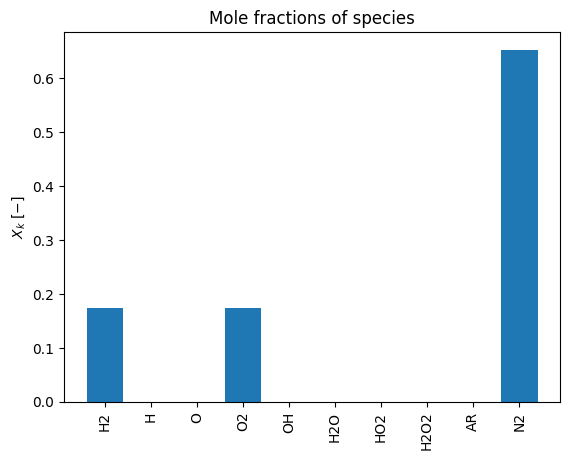

In [6]:
#
# Composition of mixture
#
plt.figure()
plt.title("Mass fractions of species")
plt.bar(x=gas.species_names, height=gas.Y)
plt.xticks(rotation=90)
plt.ylabel(r"$Y_k$ $[-]$")
plt.show()

plt.figure()
plt.title("Mole fractions of species")
plt.bar(x=gas.species_names, height=gas.X)
plt.xticks(rotation=90)
plt.ylabel(r"$X_k$ $[-]$")
plt.show()